#DOG BREED PREDICTION

In [ ]:
#connect kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oshapandey","key":"cd05790fc2c541f9ba13a85c650ff27d"}'}

In [ ]:
#install kaggle api client
!pip install -q kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#creating directory and changing current working directory
!mkdir dog_dataset
%cd dog_dataset

/content/dog_dataset


In [ ]:
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  -----  -------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp  691MB  2020-06-26 03:09:05           3854          8  0.1764706        


In [ ]:
!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd ..

 98% 676M/691M [00:10<00:00, 88.7MB/s]
100% 691M/691M [00:10<00:00, 70.9MB/s]
/content


In [ ]:
#unzipping download file and removing unusable file
!unzip dog_dataset/dogbreedidfromcomp.zip -d dog_dataset
!rm dog_dataset/dogbreedidfromcomp.zip
!rm dog_dataset/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: dog_dataset/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog_dataset/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_dataset/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_dataset/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_dataset/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_dataset/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_dataset/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_dataset/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_dataset/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_dataset/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_dataset/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_dataset/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_dataset/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog_dataset/train/840db91b

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import Adam

#Data Preprocessing

In [ ]:
labels_all=pd.read_csv("dog_dataset/labels.csv")
print(labels_all)
labels_all.head()

                                     id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
breeds_all=labels_all["breed"]
breed_counts=breeds_all.value_counts()
breed_counts.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [ ]:
#selecting first 3 breeds
classnames=['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels=labels_all[(labels_all['breed'].isin(classnames))]
labels=labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [ ]:
import numpy as np
from PIL import Image
from sklearn.preprocessing import label_binarize
from tqdm import tqdm
# creating numpy matrix with zeros
x_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# onehotencoder
y_data = label_binarize(labels['breed'], classes=classnames)
# reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = Image.open('dog_dataset/train/%s.jpg' % labels['id'][i]).resize((224, 224))
    img = np.array(img)
    x = np.expand_dims(img.copy(), axis=0)
    x_data[i] = x / 255.0
# printing train image and one-hot encode shape and size
print('\nTrain Images shape:', x_data.shape, 'size:{:,}'.format(x_data.size))
print("One hot encode output shape:", y_data.shape, 'size:{:,}'.format(y_data.size))


100%|██████████| 357/357 [00:03<00:00, 93.53it/s]


Train Images shape: (357, 224, 224, 3) size:53,738,496
One hot encode output shape: (357, 3) size:1,071


#Building the model

In [ ]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(5,5),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))#finds most dominant feature in 2x2 matrics

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16,kernel_size=(7,7),activation='relu',kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=8,kernel_size=(5,5),activation='relu',kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_regularizer='l2'))
model.add(Dense(64,activation='relu',kernel_regularizer='l2'))
model.add(Dense(len(classnames),activation='softmax'))#in multiclass classification we use softmax as last layer
model.compile(loss='categorical_crossentropy',optimizer=Adam(0.0001),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0

#data splitting

In [ ]:
x_train_val,x_test,y_train_val,y_test=train_test_split(x_data,y_data,test_size=0.1)
#spltting training set into training and validation dataset
x_train,x_val,y_train,y_val=train_test_split(x_train_val,y_train_val,test_size=0.2)

In [ ]:
#fit model
epochs=100
batch_size=128
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/100
2/2 [==============================] - 56s 34s/step - loss: 4.9158 - accuracy: 0.3047 - val_loss: 4.8882 - val_accuracy: 0.4154
Epoch 2/100
2/2 [==============================] - 40s 22s/step - loss: 4.8872 - accuracy: 0.3672 - val_loss: 4.8658 - val_accuracy: 0.4308
Epoch 3/100
2/2 [==============================] - 40s 22s/step - loss: 4.8618 - accuracy: 0.3828 - val_loss: 4.8428 - val_accuracy: 0.3538
Epoch 4/100
2/2 [==============================] - 41s 23s/step - loss: 4.8363 - accuracy: 0.4062 - val_loss: 4.8204 - val_accuracy: 0.3692
Epoch 5/100
2/2 [==============================] - 40s 21s/step - loss: 4.8110 - accuracy: 0.4258 - val_loss: 4.7984 - val_accuracy: 0.3538
Epoch 6/100
2/2 [==============================] - 40s 21s/step - loss: 4.7848 - accuracy: 0.4141 - val_loss: 4.7767 - val_accuracy: 0.3385
Epoch 7/100
2/2 [==============================] - 40s 21s/step - loss: 4.7590 - accuracy: 0.4102 - val_loss: 4.7554 - val_accuracy: 0.3231
Epoch 8/100
2/2 [===

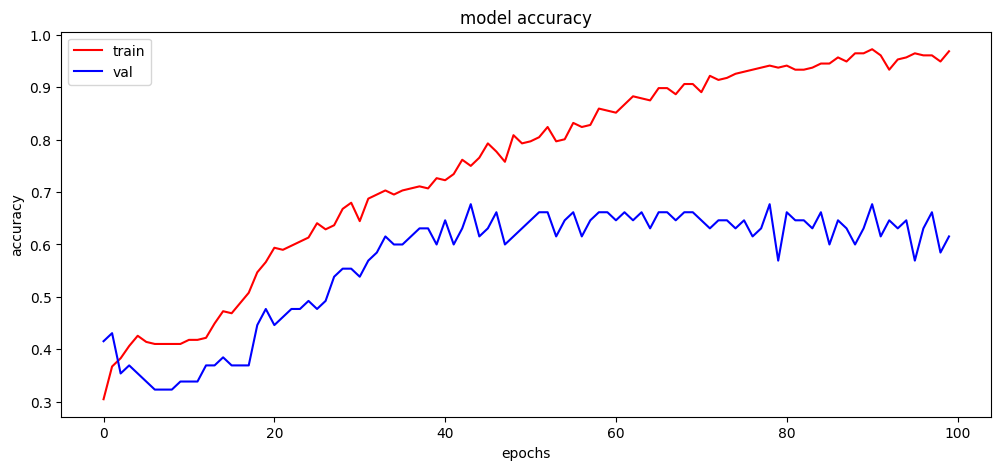

In [ ]:
#plot the training history
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','val'])
plt.show()

In [ ]:
y_pred=model.predict(x_test)
score=model.evaluate(x_test,y_test)
print('accuracy over the test set:\n',round((score[1]*100),2),'%')

2/2 [==============================] - 2s 222ms/step - loss: 3.0821 - accuracy: 0.8333
accuracy over the test set:
 83.33 %


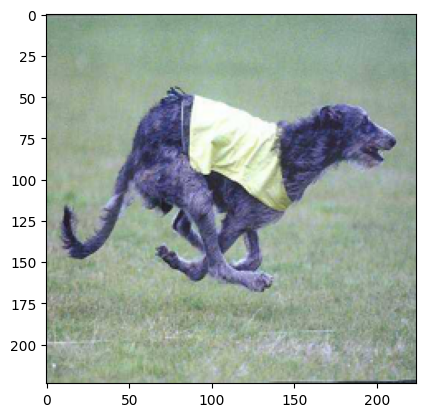

originally: scottish_deerhound
predicted: scottish_deerhound


In [ ]:
plt.imshow(x_test[1,:,:,:])
plt.show()
print('originally:',labels['breed'][np.argmax(y_test[1])])
print('predicted:',labels['breed'][np.argmax(y_pred[1])])

In [ ]:
model.save('dog_breed.h5')